In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns

In [19]:
house_data = pd.read_csv('Datasets/kc_house_data_processed.csv')

house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1690,7639,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0


In [20]:
target = house_data['price']
features = house_data.drop(['price'], axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2)

In [22]:
X_train.shape, y_train.shape

((17290, 15), (17290,))

In [23]:
X_test.shape, y_test.shape

((4323, 15), (4323,))

In [24]:
features.shape

(21613, 15)

In [25]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [26]:
def adjusted_r2(r_square, labels, features):
    adj_r_square = 1 - ((1 - r_square) * (len(labels) - 1)) / (len(labels) - features.shape[1] - 1)
    return adj_r_square

In [27]:
def build_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('Training R2:{}'.format(model.score(X_train, y_train)))
    print()
    test_r2_score = r2_score(y_test, y_pred)
    print('Testing R2:{}'.format(test_r2_score))
    print('Testing adjusted R2:{}'.format(adjusted_r2(test_r2_score, y_test, X_test)))
    
    print()
    print('Mean square error: {}'.format(mean_squared_error(y_test, y_pred)))
    print('Root mean square error: {}'.format(sqrt(mean_squared_error(y_test, y_pred))))
    print('Mean Absolute error: {}'.format(mean_absolute_error(y_test, y_pred) ))
    
    return y_pred

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [29]:
linear_regression = LinearRegression()
y_pred = build_and_evaluate_model(linear_regression, X_train, y_train, X_test, y_test)

Training R2:0.6528797170399883

Testing R2:0.6583880907212121
Testing adjusted R2:0.6571983580443647

Mean square error: 44043969010.445854
Root mean square error: 209866.55048017026
Mean Absolute error: 139105.59434284337


In [30]:
df = pd.DataFrame({'Test': y_test, 'Predicted': y_pred})
df.sample(10)

,Test,Predicted
20275,1206690.0,1.040250e+06
6051,312000.0,4.635143e+05
17170,630000.0,9.161115e+05
8353,775000.0,5.129881e+05
17187,531800.0,3.542484e+05
10565,640000.0,5.455188e+05
8499,336500.0,3.141311e+05
5314,635000.0,4.833424e+05
16894,986000.0,1.201179e+06
3051,615000.0,7.373204e+05


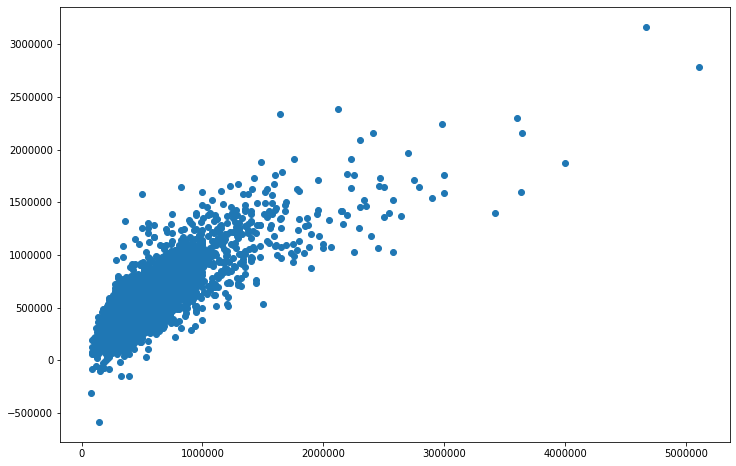

In [31]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test.values, y_pred)

In [41]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def draw_learning_curves(X, y, estimator, cv=None):
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                           train_sizes=np.linspace(.1, 1, 10))
    plt.figure(figsize=(12, 8))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.grid(True)
    
    plt.title("Learning Curves", fontsize=22)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Testing score")
    
    plt.legend(loc="best")
    
    plt.show()
    return train_scores_mean, test_scores_mean

In [42]:
cv = ShuffleSplit(n_splits=10)
cv
ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None)

ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None)

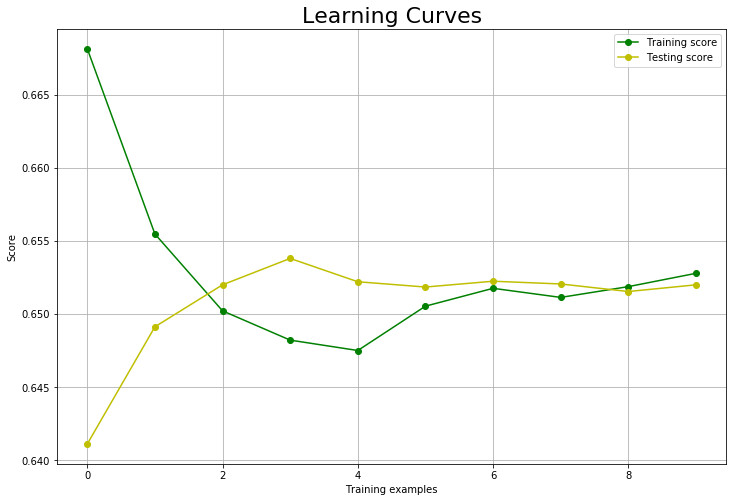

In [43]:
train_score, test_score = draw_learning_curves(X_train, y_train, linear_regression, cv)